# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


#  LOADING DATASET

In [ ]:

df = pd.read_csv('/content/train.csv')


# DATA preprocessing

In [ ]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0.0,INDIVIDUAL,49.0,0.0,31.0,311301.0,6619.0,0.0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0.0,INDIVIDUAL,109.0,0.0,53.0,182610.0,20885.0,0.0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0.0,INDIVIDUAL,66.0,0.0,34.0,89801.0,26155.0,0.0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0.0,INDIVIDUAL,39.0,0.0,40.0,9189.0,60214.0,0.0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0.0,INDIVIDUAL,18.0,0.0,430.0,126029.0,22579.0,0.0


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8170 entries, 0 to 8169
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            8170 non-null   int64  
 1   Loan Amount                   8170 non-null   int64  
 2   Funded Amount                 8170 non-null   int64  
 3   Funded Amount Investor        8170 non-null   float64
 4   Term                          8170 non-null   int64  
 5   Batch Enrolled                8170 non-null   object 
 6   Interest Rate                 8170 non-null   float64
 7   Grade                         8170 non-null   object 
 8   Sub Grade                     8170 non-null   object 
 9   Employment Duration           8170 non-null   object 
 10  Home Ownership                8170 non-null   float64
 11  Verification Status           8170 non-null   object 
 12  Payment Plan                  8169 non-null   object 
 13  Loa

****The dataset has 67463 rows and 35 columns****

In [ ]:
# Get all categorical columns
categorical_columns = df.select_dtypes(include='object')


non_categorical_columns = df.select_dtypes(exclude='object')




num_categorical_columns = len(categorical_columns.columns)


num_non_categorical_columns = len(non_categorical_columns.columns)

print("Total Categorical Columns:", num_categorical_columns)
print("Categorical Columns:", categorical_columns.columns.tolist())

print("\nTotal Non-Categorical Columns:", num_non_categorical_columns)
print("Non-Categorical Columns:", non_categorical_columns.columns.tolist())

Total Categorical Columns: 9
Categorical Columns: ['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']

Total Non-Categorical Columns: 26
Non-Categorical Columns: ['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']


In [ ]:
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    1
Loan Title                      1
Debit to Income                 1
Delinquency - two years         1
Inquires - six months           1
Open Account                    1
Public Record                   1
Revolving Balance               1
Revolving Utilities             1
Total Accounts                  1
Initial List Status             1
Total Received Interest         1
Total Received Late Fee         1
Recoveries                      1
Collection Recovery Fee         1
Collection 12 months Medical    1
Application Type                1
Last week Pay 

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
values = imp.fit([[1, 2], [np.nan, 3], [7, 6]])

In [ ]:
df.dropna()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0.0,INDIVIDUAL,49.0,0.0,31.0,311301.0,6619.0,0.0
1,1450153,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0.0,INDIVIDUAL,109.0,0.0,53.0,182610.0,20885.0,0.0
2,1969101,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0.0,INDIVIDUAL,66.0,0.0,34.0,89801.0,26155.0,0.0
3,6651430,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0.0,INDIVIDUAL,39.0,0.0,40.0,9189.0,60214.0,0.0
4,14354669,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0.0,INDIVIDUAL,18.0,0.0,430.0,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,37102610,9320,7834,8114.253470,59,BAT5924421,12.952976,A,A5,MORTGAGE,...,1.518692,0.293075,0.0,INDIVIDUAL,135.0,0.0,5.0,77918.0,4190.0,0.0
8165,5744434,13145,19474,6074.414929,58,BAT5525466,9.090364,C,E1,MORTGAGE,...,4.214143,1.246481,0.0,INDIVIDUAL,109.0,0.0,33.0,75601.0,43298.0,0.0
8166,48712902,21508,15397,1815.844500,59,BAT2803411,14.464054,B,A2,MORTGAGE,...,2.177915,0.828392,0.0,INDIVIDUAL,74.0,0.0,26.0,33243.0,9935.0,0.0
8167,28152186,16703,5150,5480.859503,59,BAT1780517,14.445561,C,B4,RENT,...,0.133087,0.790260,0.0,INDIVIDUAL,50.0,0.0,19.0,35579.0,18227.0,0.0


In [ ]:

df.duplicated().sum()

0

In [ ]:

categorical_columns = df.select_dtypes(include='object')


categorical_columns.describe()


,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,8170,8170,8170,8170,8170,8169,8169,8169,8169
unique,41,7,35,3,4,1,92,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,434,2336,545,4358,4104,8169,3732,4415,8155


In [ ]:

for column in categorical_columns.columns:
    unique_values = df[column].unique()
    print(f'Categories in "{column}" are: {unique_values}')
    print(df[column].value_counts())
    print('-' * 100)

Categories in "Batch Enrolled" are: ['BAT2522922' 'BAT1586599' 'BAT2136391' 'BAT2428731' 'BAT5341619'
 'BAT4694572' 'BAT4808022' 'BAT2558388' 'BAT2078974' 'BAT2252229'
 'BAT2333412' 'BAT5849876' 'BAT2833642' 'BAT2803411' 'BAT5525466'
 'BAT5714674' 'BAT2003848' 'BAT4722912' 'BAT3873588' 'BAT1780517'
 'BAT4271519' 'BAT5811547' 'BAT1184694' 'BAT4136152' 'BAT3193689'
 'BAT1467036' 'BAT2575549' 'BAT4351734' 'BAT1104812' 'BAT5924421'
 'BAT1930365' 'BAT1766061' 'BAT5489674' 'BAT3865626' 'BAT5629144'
 'BAT5547201' 'BAT224923' 'BAT3726927' 'BAT3461431' 'BAT1761981'
 'BAT1135695']
BAT3873588    434
BAT1586599    380
BAT1104812    366
BAT2252229    317
BAT2078974    293
BAT2803411    290
BAT1780517    289
BAT4694572    284
BAT2575549    279
BAT1184694    274
BAT1930365    243
BAT2558388    242
BAT4271519    231
BAT2136391    226
BAT4136152    221
BAT2333412    220
BAT3193689    215
BAT5629144    207
BAT1766061    202
BAT3726927    202
BAT5489674    201
BAT5341619    195
BAT5525466    180
BAT59244

data preprossing and cleaning

The dataset is now clean. There are no more missing values.

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


print(df)


            ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0     65087372        10000          32236            12329.362860    59   
1      1450153         3609          11940            12191.996920    59   
2      1969101        28276           9311            21603.224550    59   
3      6651430        11170           6954            17877.155850    59   
4     14354669        16890          13226            13539.926670    59   
...        ...          ...            ...                     ...   ...   
8165   5744434        13145          19474             6074.414929    58   
8166  48712902        21508          15397             1815.844500    59   
8167  28152186        16703           5150             5480.859503    59   
8168  13253762        20164          30620             8812.515975    59   
8169  36523262         8510           9628             5344.428743    36   

      Batch Enrolled  Interest Rate  Grade  Sub Grade  Employment Duration  \
0        

In [ ]:
from sklearn.model_selection import  train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score

In [ ]:
X = df.drop('Loan Status',axis=1)
y = df['Loan Status']

In [ ]:
df_encode=df.drop(['Loan Title',"Accounts Delinquent",'Batch Enrolled','Sub Grade','Payment Plan','ID'],axis=1)
df=pd.get_dummies(df_encode,columns=['Term', 'Grade', 'Employment Duration', 'Verification Status',
       'Initial List Status', 'Application Type'],drop_first=True)

In [ ]:
# X = df.drop('Loan Status', axis=1)
# y = df['Loan Status']

# # Handle missing values in features
# imputer_features = SimpleImputer(strategy='mean')
# X_imputed = imputer_features.fit_transform(X)

# # Handle missing values in target variable
# imputer_target = SimpleImputer(strategy='most_frequent')
# y_imputed = imputer_target.fit_transform(y.values.reshape(-1, 1))

# # Check if there are still any NaN values
# nan_indices_X = pd.DataFrame(X_imputed).isnull().any(axis=1)
# nan_indices_y = pd.DataFrame(y_imputed).isnull().values.ravel()

# # Identify and remove rows with NaN values
# nan_indices = np.logical_or(nan_indices_X, nan_indices_y)
# X_cleaned = X_imputed[~nan_indices]
# y_cleaned = y_imputed[~nan_indices]

# # Apply SMOTE
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X_cleaned, np.ravel(y_cleaned))


In [ ]:

from imblearn.over_sampling import SMOTE
smote=SMOTE()
smote.fit(X,y)
X,y=smote.fit_resample(X,y)

In [ ]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

statistics for numerical columns

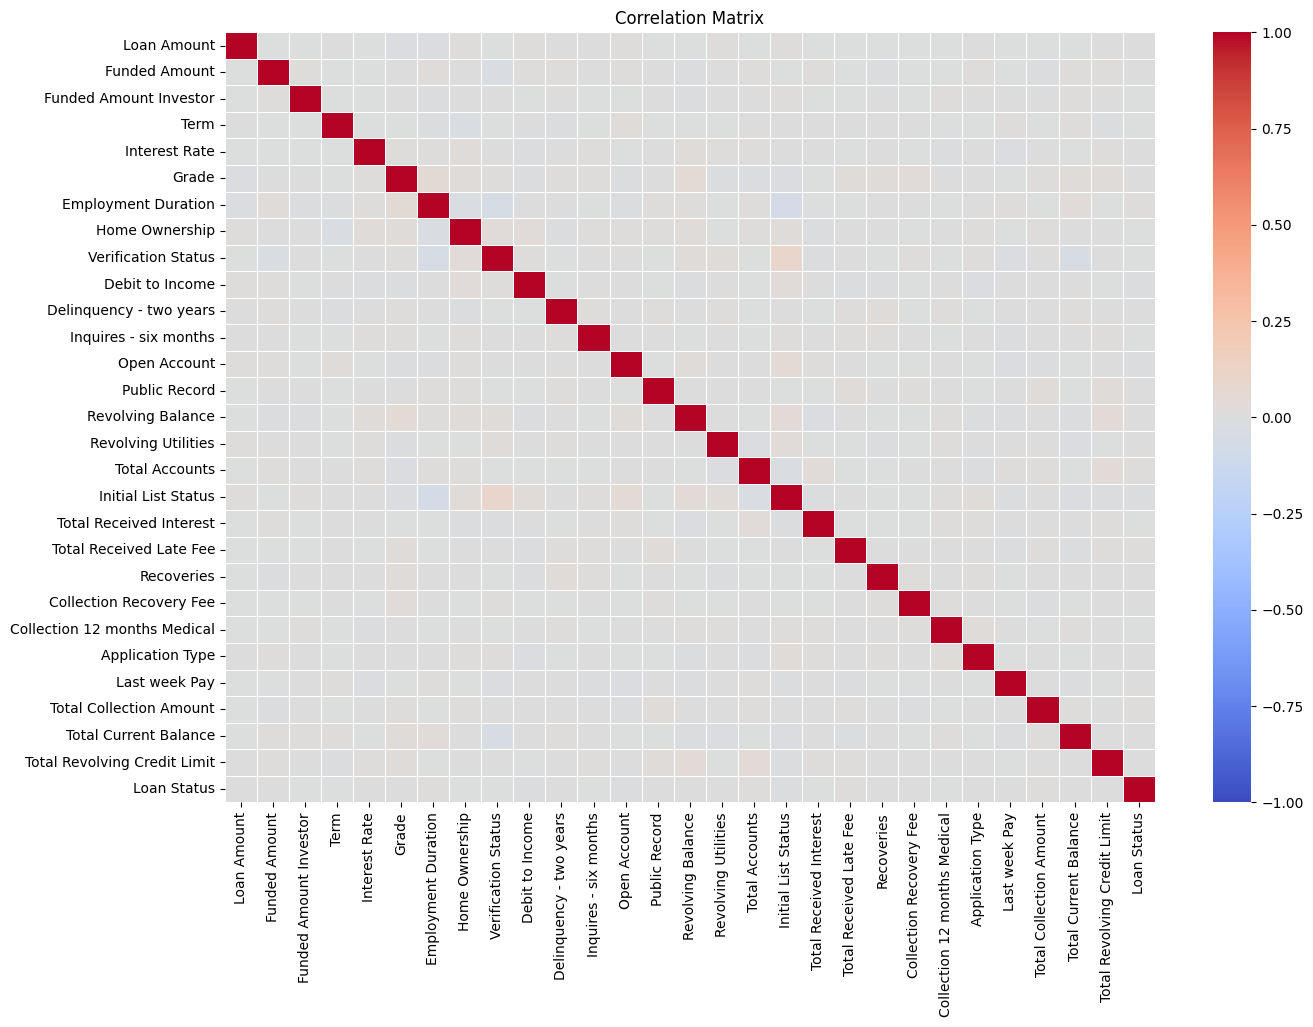

In [ ]:
# 3. Correlation Analysis

correlation_matrix = df_encode.select_dtypes(include=np.number).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, annot=False, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



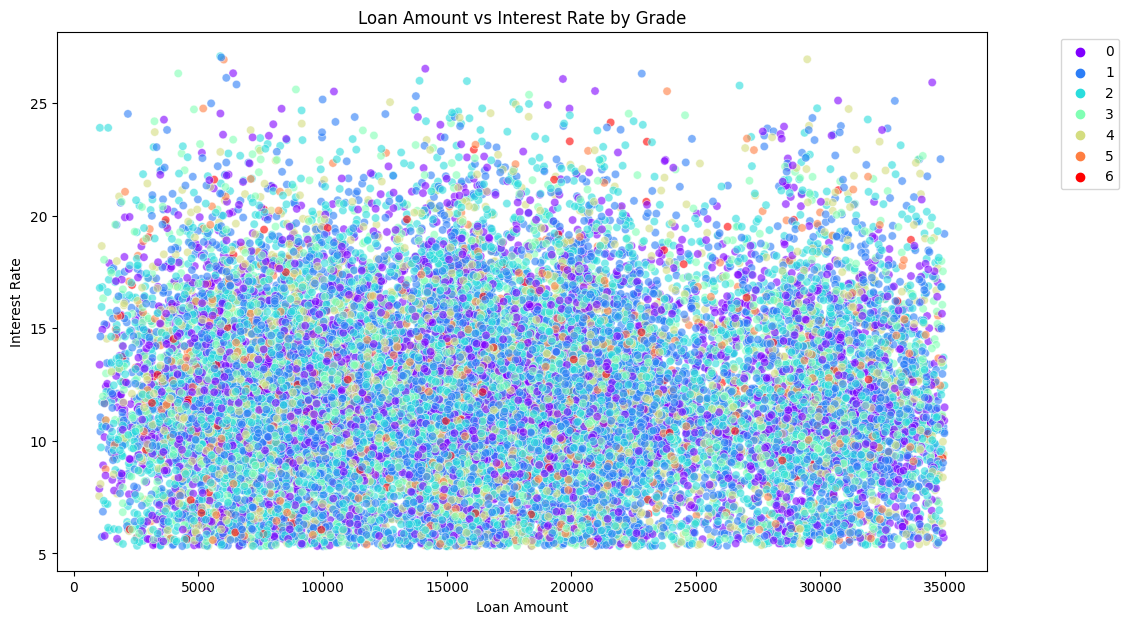

In [ ]:
# 4. Multivariate Analysis

# Scatter plot of "Loan Amount" vs "Interest Rate" with hue based on "Grade"
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_encode, x="Loan Amount", y="Interest Rate", hue="Grade", palette="rainbow", alpha=0.6)
plt.title('Loan Amount vs Interest Rate by Grade')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

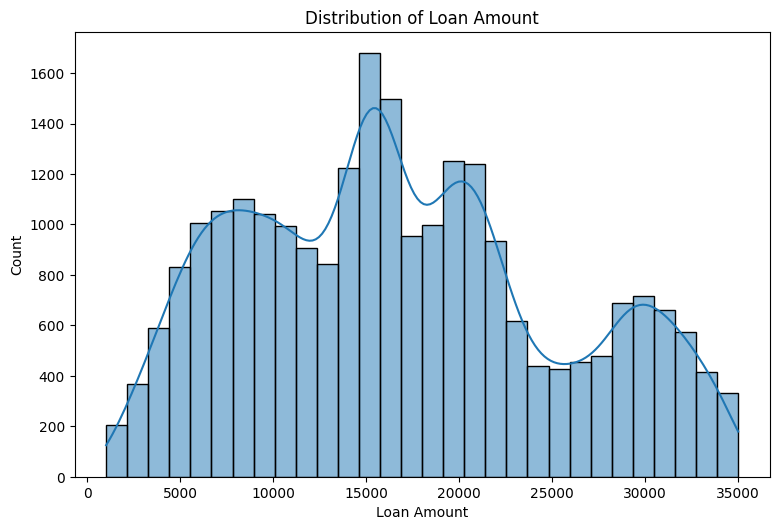

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,24524.000000,24524.000000,24524.000000,24524.000000,24524.000000,24524.000000,24524.000000,24524.000000,24524.000000,24524.000000,...,24524.000000,24524.000000,24524.000000,24524.000000,24524.000000,24524.000000,24524.000000,2.452400e+04,24524.000000,24524.000000
mean,16823.183901,15784.037759,14640.701846,58.164533,11.863649,1.819605,0.815161,80426.439151,1.026138,23.323942,...,1.165656,60.927355,1.122071,0.020878,0.001509,71.270103,147.760316,1.579939e+05,23126.124898,0.094275
std,8353.447582,8172.246464,6839.229316,3.343126,3.733950,1.384784,0.929017,45071.575121,0.711899,8.432050,...,5.280677,362.954274,3.402943,0.142977,0.038814,43.261210,743.321578,1.386279e+05,20870.250499,0.292217
min,1020.000000,1098.000000,1127.754818,36.000000,5.320159,0.000000,0.000000,14788.613940,0.000000,0.675299,...,0.000003,0.000036,0.000045,0.000000,0.000000,0.000000,1.000000,6.230000e+02,1000.000000,0.000000
25%,10011.750000,9235.000000,9810.587693,58.000000,9.324144,1.000000,0.000000,51417.669017,1.000000,16.842557,...,0.021000,1.644589,0.480114,0.000000,0.000000,35.000000,24.000000,4.969250e+04,8207.750000,0.000000
50%,16042.000000,13044.000000,12773.622225,59.000000,11.388885,2.000000,0.000000,69247.602950,1.000000,22.770836,...,0.043084,3.344434,0.781379,0.000000,0.000000,68.000000,36.000000,1.159860e+05,16746.000000,0.000000
75%,22077.000000,21823.500000,18084.910615,59.000000,14.198873,3.000000,2.000000,94554.512180,2.000000,30.038834,...,0.072191,5.452087,1.074960,0.000000,0.000000,104.000000,46.000000,2.244505e+05,32201.500000,0.000000
max,34995.000000,34999.000000,34999.746430,59.000000,27.070004,6.000000,2.000000,406561.536400,2.000000,39.625908,...,42.618882,4330.782063,54.222788,1.000000,1.000000,161.000000,16013.000000,1.091714e+06,197112.000000,1.000000


In [ ]:
#  Statistics & Data Visualization


desc_stats = df_encode.describe()


plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.histplot(df_encode['Loan Amount'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')



plt.tight_layout()
plt.show()

desc_stats

Text(0.5, 1.0, 'Distribution of Interest Rate')

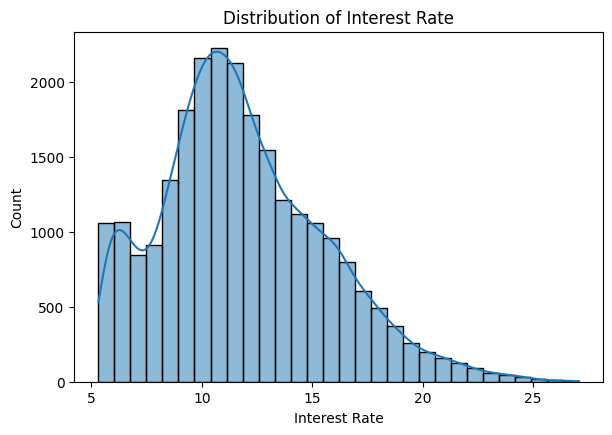

In [ ]:
# Histogram for "Interest Rate"
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.histplot(df_encode['Interest Rate'], kde=True, bins=30)
plt.title('Distribution of Interest Rate')



Text(0.5, 1.0, 'Count of Loans by Grade')

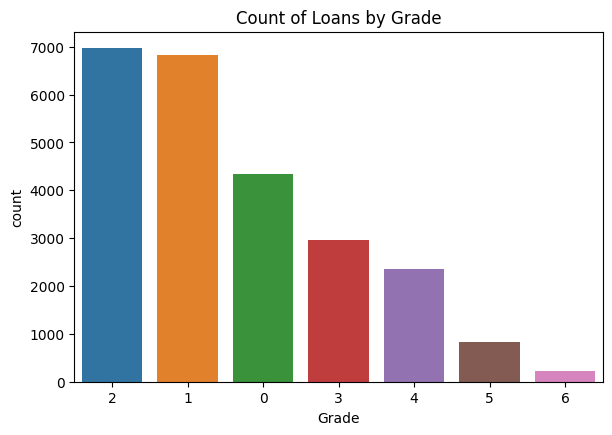

In [ ]:
# Bar plot for "Grade"
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.countplot(data=df_encode, x='Grade', order=df_encode['Grade'].value_counts().index)
plt.title('Count of Loans by Grade')



Text(0.5, 1.0, 'Loan Amount by Grade')

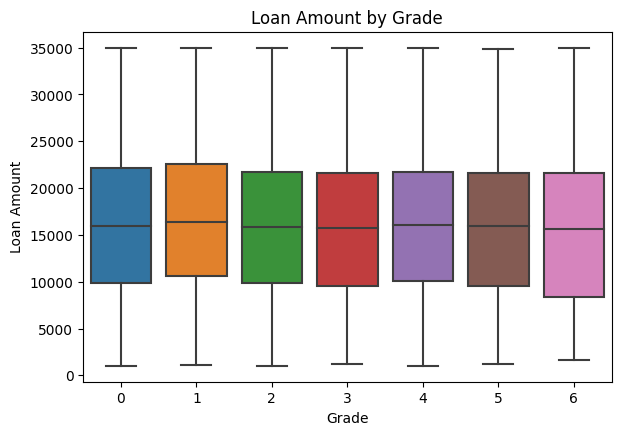

In [ ]:
# Box plot for "Loan Amount" by "Grade"
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
sns.boxplot(data=df_encode, x='Grade', y='Loan Amount')
plt.title('Loan Amount by Grade')

In [ ]:
def feature_imp(df, model):
    ftr_imp = pd.DataFrame()  # Create an empty DataFrame
    ftr_imp["feature"] = df.columns  # Assign column names of the input DataFrame to "feature" column
    ftr_imp["importance"] = model.feature_importances_  # Assign feature importances from the model to "importance" column
    return ftr_imp.sort_values(by="importance", ascending=true)  # Sort the DataFrame by "importance" column in Ascending order

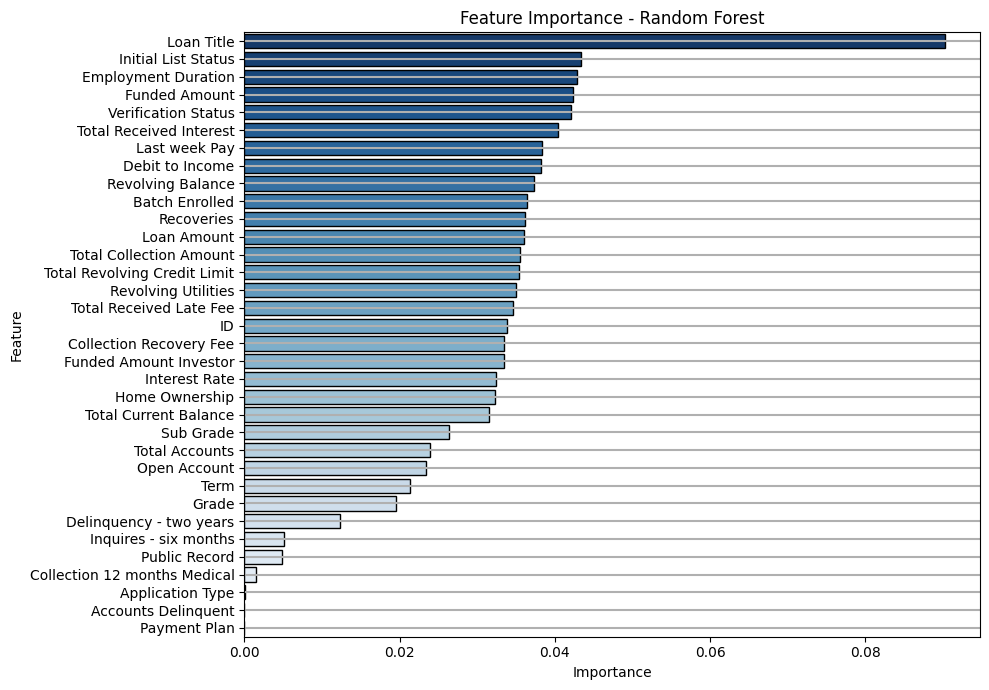

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importance = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
df_importance = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})

# Sort the DataFrame by importance in descending order
df_importance_sorted = df_importance.sort_values(by='importance', ascending=False )

plt.figure(figsize=(10, 7))

ax = sns.barplot(data=df_importance_sorted, x='importance', y='feature', palette='Blues_r', edgecolor='black')

# Set x-axis label
ax.set_xlabel('Importance')


ax.set_ylabel('Feature')


plt.title('Feature Importance - Random Forest')


ax.grid(linestyle='-', linewidth=1.5, axis='y')

plt.tight_layout()  # Adjust the spacing
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc

random forest and logistic regression

In [ ]:
models = {

    'Random Forest Classifier': RandomForestClassifier(random_state=42,max_depth=None,min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100
    ),

    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results.append([name, accuracy, precision, recall, f1, roc_auc])
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])
print(results_df)

                      Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0  Random Forest Classifier  0.899138   0.924248  0.866147  0.894255  0.953140
1       Logistic Regression  0.672914   0.657928  0.699287  0.677977  0.729927


grid search for rando forest and logestic regression to tune parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Define the models
models = {
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
}

# Define the hyperparameter grids for grid search
param_grids = {
    'Random Forest Classifier': {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2']
    }
}

# Perform grid search for each model
for model_name, model in models.items():
    print(f"Performing Grid Search for {model_name}")

ct
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)


    grid_search.fit(X_train, y_train)


    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")

    # Predict on the test set using the best model
    y_pred = grid_search.best_estimator_.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on the test set for {model_name}: {accuracy}")
    print("\n")


Performing Grid Search for Random Forest Classifier
Best hyperparameters for Random Forest Classifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on the test set for Random Forest Classifier: 0.9082723691615081


Performing Grid Search for Logistic Regression
Best hyperparameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2'}
Accuracy on the test set for Logistic Regression: 0.6746201463140123




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

traind models with best parameters

In [ ]:
models = {

    'Random Forest Classifier': RandomForestClassifier(random_state=42,max_depth=None,min_samples_leaf= 1, min_samples_split= 2, n_estimators = 100
    ),

    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
}

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
results = []

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results.append([name, accuracy, precision, recall, f1, roc_auc])

In [ ]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])
print(results_df)

                      Model  Accuracy  Precision   Recall  F1 Score   AUC-ROC
0  Random Forest Classifier  0.908272   0.929645  0.88230  0.905354  0.960621
1       Logistic Regression  0.675183   0.662288  0.70756  0.684176  0.734585


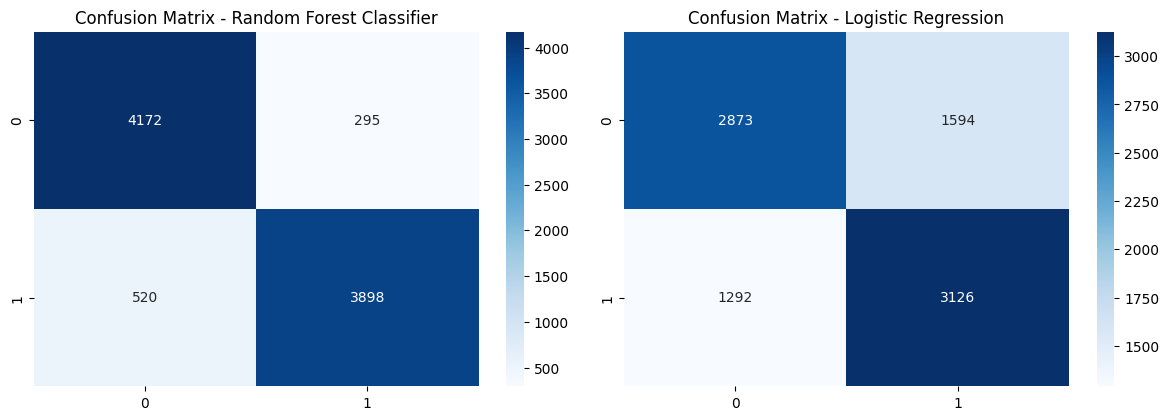

In [ ]:
plt.figure(figsize=(12, 8))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix - {name}')

plt.tight_layout()
plt.show()

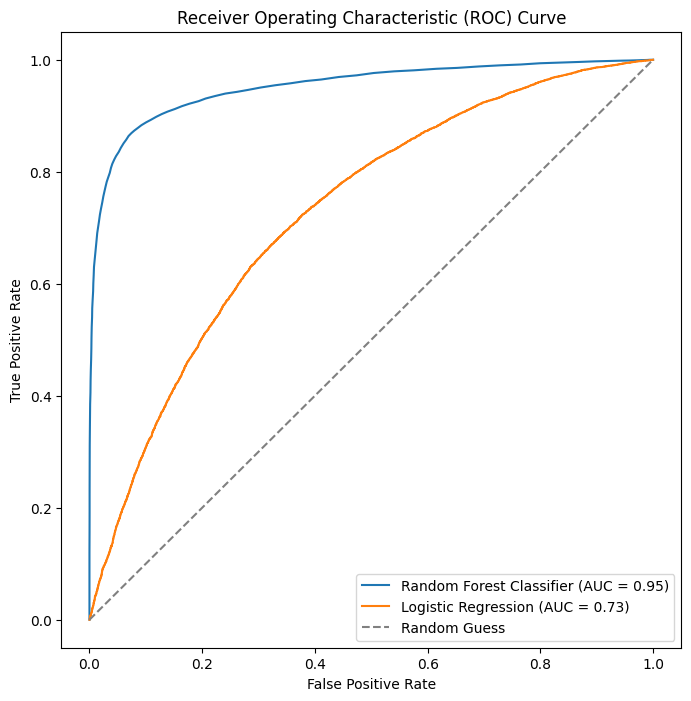

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Function to plot ROC curve
def plot_roc_curve(y_true, y_probs, label):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves for each model
plt.figure(figsize=(8, 8))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_probs, name)

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

random search

In [ ]:
param_dist = {
    'n_estimators': [10, 50, 70],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    }

# RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Random search of parameters using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=2, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

# Best parameters
best_params = rf_random.best_params_
print("Best Parameters:", best_params)


Fitting 2 folds for each of 36 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [ ]:
best_params={'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:}")







Accuracy: 0.908460754332314


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


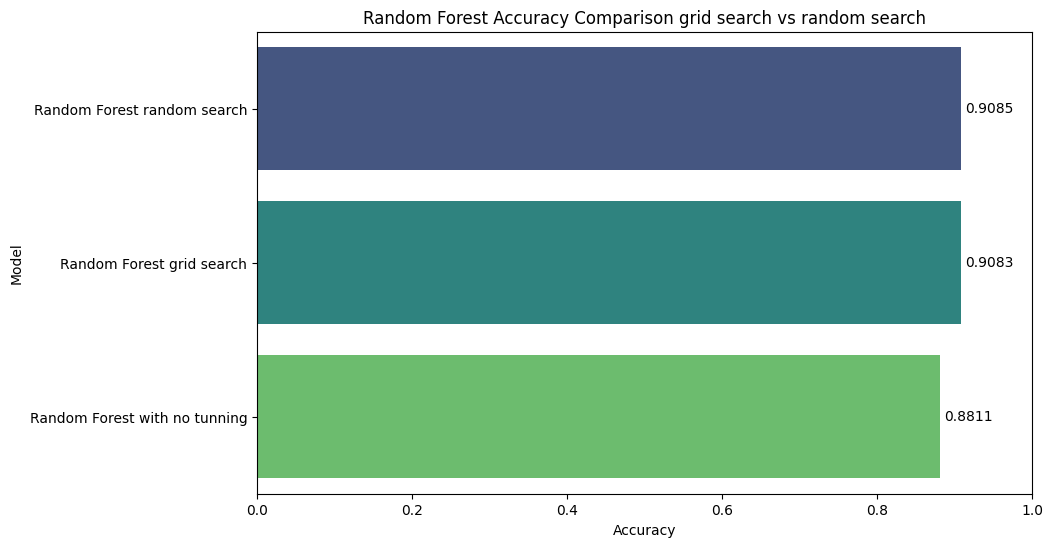

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



model_names = ['Random Forest with no tunning','Random Forest grid search', 'Random Forest random search']
accuracy_scores = [0.8810804727068092,0.908272, 0.908460754332314]

accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

# Sort the DataFrame by accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Random Forest Accuracy Comparison grid search vs random search')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)

for i, value in enumerate(accuracy_df['Accuracy']):
    plt.text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=10)

plt.show()

svm

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


target_column = 'Loan Status'
features = df.drop(target_column, axis=1)
target = df[target_column]


param_dist = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
}

# Initialize the SVM model
svm_model = SVC()


random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=3, cv=2, scoring='accuracy', random_state=42)

# Perform randomized search on the training data
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train, y_train)


y_pred = best_svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)





Best Parameters: {'kernel': 'rbf', 'C': 1}
Accuracy: 0.8206950059210257
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82     12431
           1       0.82      0.82      0.82     12058

    accuracy                           0.82     24489
   macro avg       0.82      0.82      0.82     24489
weighted avg       0.82      0.82      0.82     24489



Accuracy: 0.8206950059210257
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82     12431
           1       0.82      0.82      0.82     12058

    accuracy                           0.82     24489
   macro avg       0.82      0.82      0.82     24489
weighted avg       0.82      0.82      0.82     24489



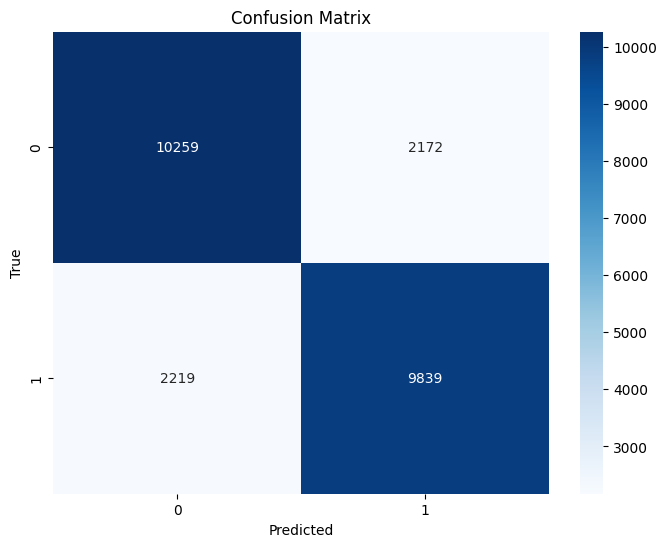

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Create an SVM classifier
clf = SVC(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


RNN

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Define features
X = df.drop('Loan Status', axis=1)
y = df['Loan Status']


X = pd.get_dummies(X)



# Reshape the data for RNN (assuming a time sequence structure)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)




Epoch 1/100
614/614 [==============================] - 5s 5ms/step - loss: 0.3381 - accuracy: 0.8981 - val_loss: 0.3138 - val_accuracy: 0.9085
Epoch 2/100
614/614 [==============================] - 2s 3ms/step - loss: 0.3172 - accuracy: 0.9050 - val_loss: 0.3159 - val_accuracy: 0.9085
Epoch 3/100
614/614 [==============================] - 2s 3ms/step - loss: 0.3135 - accuracy: 0.9050 - val_loss: 0.3137 - val_accuracy: 0.9085
Epoch 4/100
614/614 [==============================] - 2s 3ms/step - loss: 0.3109 - accuracy: 0.9050 - val_loss: 0.3143 - val_accuracy: 0.9085
Epoch 5/100
614/614 [==============================] - 2s 3ms/step - loss: 0.3087 - accuracy: 0.9051 - val_loss: 0.3141 - val_accuracy: 0.9085
Epoch 6/100
154/154 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score



accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)


print(f"Accuracy: {accuracy:.4f}")

print(f"ROC AUC: {roc_auc:.4f}")


print('Classification Report:')
print(classification_report_str)



Accuracy: 0.9085
ROC AUC: 0.4946
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4456
           1       0.00      0.00      0.00       449

    accuracy                           0.91      4905
   macro avg       0.45      0.50      0.48      4905
weighted avg       0.83      0.91      0.86      4905



KNN

Accuracy: 0.8843
ROC AUC: 0.4999
Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      1460
         1.0       0.11      0.01      0.02       174

    accuracy                           0.88      1634
   macro avg       0.50      0.50      0.48      1634
weighted avg       0.81      0.88      0.84      1634



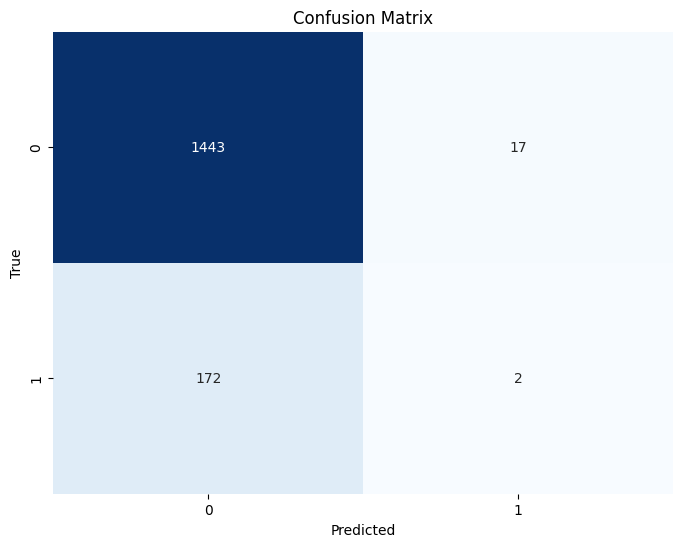

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, roc_auc_score
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)


# Train the modl
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)



y_pred = knn_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)  # Calculate ROC AUC

print(f"Accuracy: {accuracy:.4f}")
print(f'ROC AUC: {roc_auc:.4f}')
print('Confusion Matrix:')

print('Classification Report:')
print(classification_report_str)

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


decision tree

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report




clf = DecisionTreeClassifier(random_state=42)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f'ROC AUC: {roc_auc:.4f}')
print("Classification Report:\n", classification_rep)


Accuracy: 0.8157894736842105
ROC AUC: 0.4999
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      1460
         1.0       0.14      0.14      0.14       174

    accuracy                           0.82      1634
   macro avg       0.52      0.52      0.52      1634
weighted avg       0.82      0.82      0.82      1634



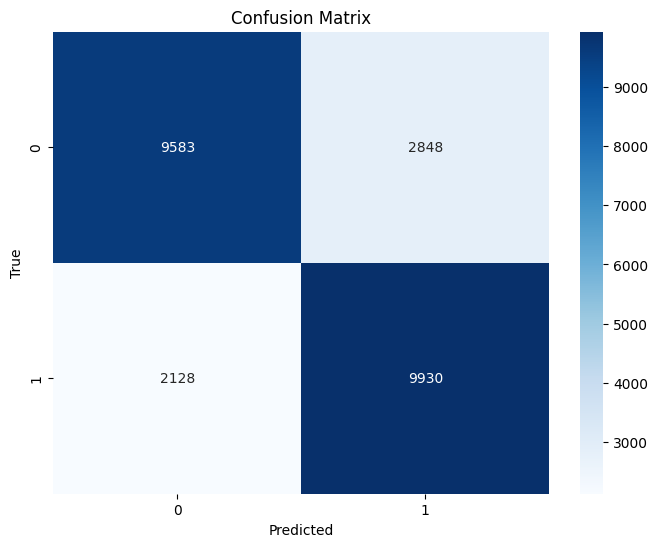

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

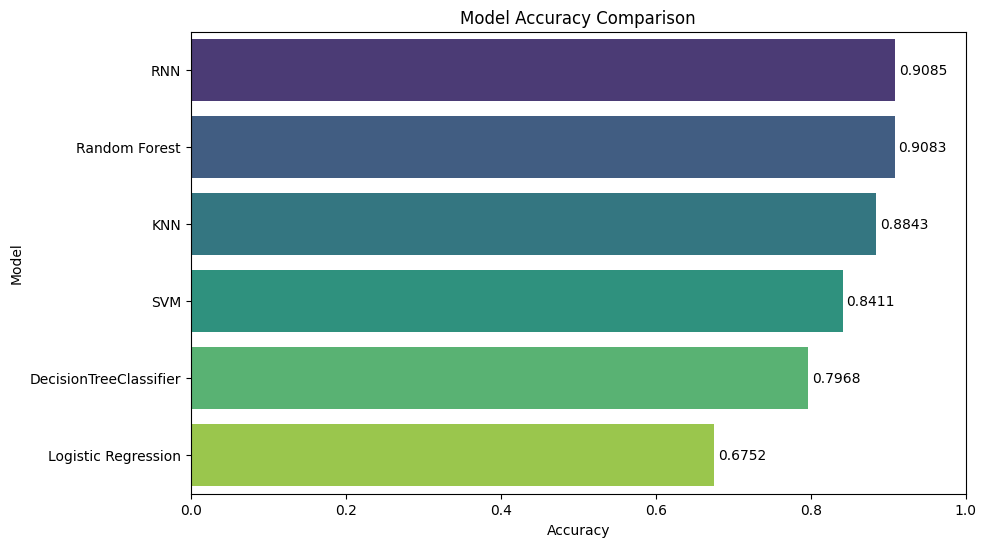

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with model names and their accuracy scores
model_names = ['Random Forest', 'Logistic Regression', 'SVM', 'RNN', 'KNN','DecisionTreeClassifier']
accuracy_scores = [0.908272, 0.675183, 0.8410804727068092, 0.9085, 0.8843,0.7968067295520438]

accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

# Sort the DataFrame by accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)


for i, value in enumerate(accuracy_df['Accuracy']):
    plt.text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=10)

plt.show()
